In [19]:
import numpy as np
import pandas as pd
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt

In [20]:
df_train = pd.read_csv("C:/Users/admin/OneDrive/Time_series/train.csv")
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [22]:
a=int(2251262633%7+1)
print(a)

5


In [23]:
df_train= df_train.loc[(df_train["Publication_Day"]=="Friday")]
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
31,31,Global News,Episode 92,118.15,News,86.22,Friday,Morning,64.88,2.0,Neutral,57.48380
34,34,Study Sessions,Episode 30,8.66,Education,49.75,Friday,Morning,NaN,3.0,Neutral,6.67525
35,35,Sport Spot,Episode 63,75.02,Sports,95.89,Friday,Night,59.71,0.0,Positive,40.33025
58,58,Sports Central,Episode 33,31.90,Sports,63.61,Friday,Evening,64.38,1.0,Negative,19.28000
83,83,Sports Central,Episode 80,25.34,Sports,53.30,Friday,Evening,NaN,3.0,Positive,23.71495


In [24]:
df_train.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         12149
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    20732
Number_of_Ads                      1
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64

In [25]:
columns_1=["Episode_Length_minutes","Guest_Popularity_percentage"]

In [26]:
for col_1 in columns_1:
    df_train[col_1]= df_train[col_1].interpolate(method='linear')

In [27]:

columns_2=["Number_of_Ads"]
for col_2 in columns_2:
    df_train[col_2] =df_train[col_2].fillna(method='ffill')

C:\Users\admin\AppData\Local\Temp\ipykernel_17864\2786674308.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train[col_2] =df_train[col_2].fillna(method='ffill')


In [28]:
df_train.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [29]:
df_train=df_train.drop(columns =['Publication_Day'])
df_train.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
31,31,Global News,Episode 92,118.15,News,86.22,Morning,64.880,2.0,Neutral,57.48380
34,34,Study Sessions,Episode 30,8.66,Education,49.75,Morning,62.295,3.0,Neutral,6.67525
35,35,Sport Spot,Episode 63,75.02,Sports,95.89,Night,59.710,0.0,Positive,40.33025
58,58,Sports Central,Episode 33,31.90,Sports,63.61,Evening,64.380,1.0,Negative,19.28000
83,83,Sports Central,Episode 80,25.34,Sports,53.30,Evening,50.370,3.0,Positive,23.71495


In [30]:
columns=['Podcast_Name','Episode_Title','Genre','Publication_Time','Episode_Sentiment']
for col in columns:
    print(df_train[col].unique())

['Global News' 'Study Sessions' 'Sport Spot' 'Sports Central'
 'Mystery Matters' 'Home & Living' 'Daily Digest' 'Tech Trends'
 'Lifestyle Lounge' 'Finance Focus' 'Fitness First' "Athlete's Arena"
 'Criminal Minds' 'News Roundup' 'Life Lessons' 'Wellness Wave'
 'Sound Waves' 'Current Affairs' 'Style Guide' 'Business Briefs'
 'Money Matters' 'Comedy Corner' 'Brain Boost' 'Game Day'
 'Fashion Forward' 'Healthy Living' 'Mind & Body' 'Laugh Line'
 'Health Hour' 'Funny Folks' 'Crime Chronicles' 'Tune Time'
 'Digital Digest' 'Gadget Geek' 'World Watch' 'Joke Junction'
 'True Crime Stories' 'Humor Hub' 'Innovators' 'Business Insights'
 'Sports Weekly' 'Tech Talks' 'Detective Diaries' 'Market Masters'
 'Learning Lab' 'Melody Mix' 'Educational Nuggets' 'Music Matters']
['Episode 92' 'Episode 30' 'Episode 63' 'Episode 33' 'Episode 80'
 'Episode 40' 'Episode 49' 'Episode 96' 'Episode 78' 'Episode 38'
 'Episode 85' 'Episode 87' 'Episode 58' 'Episode 88' 'Episode 50'
 'Episode 1' 'Episode 4' 'Episod

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df_train.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le
df_train.head(10)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
31,31,18,92,118.15,6,86.22,2,64.880,2.0,1,57.48380
34,34,40,24,8.66,2,49.75,2,62.295,3.0,1,6.67525
35,35,37,60,75.02,7,95.89,3,59.710,0.0,2,40.33025
58,58,38,27,31.90,7,63.61,1,64.380,1.0,0,19.28000
83,83,38,79,25.34,7,53.30,1,50.370,3.0,2,23.71495
95,95,34,35,94.45,9,53.37,0,36.360,0.0,2,66.59645
96,96,21,44,60.26,4,34.26,1,51.180,1.0,1,48.28618
107,107,8,96,37.31,6,57.78,0,5.620,1.0,1,9.77975
108,108,43,76,85.12,8,62.19,2,9.000,2.0,2,58.26835
112,112,28,32,84.42,4,48.29,2,26.190,1.0,1,50.90406


In [32]:
observations = df_train['Listening_Time_minutes'].values

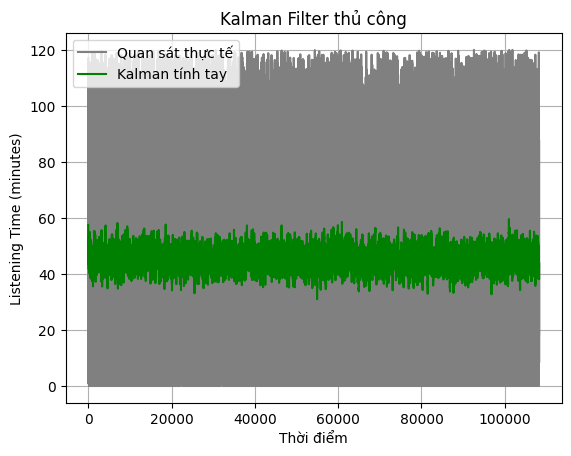

In [33]:
n = len(observations)
x_est = np.zeros(n)
P = np.zeros(n)
Q = 0.01  # nhiễu hệ thống
R = 10    # nhiễu quan sát
x_est[0] = observations[0]
P[0] = 1

for t in range(1, n):
    # Dự đoán
    x_pred = x_est[t-1]
    P_pred = P[t-1] + Q

    # Cập nhật
    K = P_pred / (P_pred + R)
    x_est[t] = x_pred + K * (observations[t] - x_pred)
    P[t] = (1 - K) * P_pred


plt.plot(observations, label='Quan sát thực tế', color='gray')
plt.plot(x_est, label='Kalman tính tay', color='green')
plt.title('Kalman Filter thủ công')
plt.xlabel('Thời điểm')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()